# Telco Customer Churn Prediction Analysis
## Internship Project 2 at Mentorness

**Author**: Siddhant Ghosh  
**LinkedIn Id**: [Siddhant Ghosh](https://www.linkedin.com/in/siddhant-ghosh-/)

![Churn Prediction](https://miro.medium.com/v2/resize:fit:828/format:webp/1*WqId29D5dN_8DhiYQcHa2w.png)


### Import Libraries & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
import matplotlib.ticker as mtick  
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve,roc_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import confusion_matrix,  auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import warnings
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# To prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')
# Setting up the Global random seed
np.random.seed(0)
# Set style and context
style.use('ggplot')
sns.set_context('talk')
%matplotlib inline

### About Churn analysis

The churn rate, also known as the attrition rate, quantifies the number of individuals or items departing from a collective group within a specific timeframe. While applicable in various contexts, the most common association of churn rate is observed in businesses, particularly concerning customers who discontinue purchasing products or services.

Innovative customer retention strategies are paramount in industries like Software as a Service (SaaS) and membership-based businesses, which rely on subscription-based models. Analyzing growth within these sectors often entails monitoring key metrics such as revenues and the ratio of new customers, alongside conducting customer segmentation analysis and predicting lifetime value. The churn rate serves as a critical input for modeling customer lifetime value, aiding in estimating the net profit derived from the entire future relationship with a customer. Simultaneously, it denotes the proportion of customers discontinuing their subscriptions to a service or product within a specified period, resulting in revenue loss.

Given the evident market saturation in sectors like SaaS, where numerous alternatives exist for every product, understanding the churn rate is instrumental in adopting effective retention and marketing strategies. Moreover, it facilitates the implementation of Know-Your-Customer (KYC) initiatives tailored to subscription-driven businesses.

- **Customer and Revenue Churn:**
  - Customer churn: Rate at which customers cancel subscriptions, measured in percentages.
  - Revenue churn: Decrease in monthly recurring revenue (MRR), which can occur through cancellations or downgrades.
  
- **Voluntary vs. Involuntary Churn:**
  - Voluntary churn: Customers actively decide to cancel subscriptions due to dissatisfaction or other reasons.
  - Involuntary churn: Results from situations like expired payment details or server errors, where customers are unable to continue subscriptions without action.

- **Factors Contributing to Churn:**
  - Poor customer service, financial issues, changing customer needs, dissatisfaction, failure to demonstrate value, competition, and lack of appreciation for long-time customers.
  
- **Challenges in Building Churn Model:**
  - Inaccurate data, weak exploratory analysis, lack of domain knowledge, selection of suitable modeling approaches, validation metrics, business line specifics, churn event censorship, concept drift, and imbalanced data.

- **Importance of Churn Prediction:**
  - Allows businesses to identify at-risk customers, understand pain points, and develop strategies for customer retention.
  
- **Applications of Churn Prediction:**
  - Telecommunications, software as a service (SaaS), retail, subscription-based services, finance, marketing, and human resource management.

- **Customization of Churn Prediction Models:**
  - Models must be tailored to each company's unique needs, goals, and data architecture to effectively address churn and enhance customer retention.

The churn rate is very important in the telecommunications industry (wireless and cable service providers, satellite television providers, internet providers, etc). The churn rate in this use case provides clarity on the quality of the business, shows customer satisfaction with the product or service, and allows for comparison with competitors to gauge an acceptable level of churn. 

### Import and Analyze the Dataset


In [2]:
main_df = pd.read_csv("Customer_Churn.csv")
df = main_df.copy()
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2200,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,...,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,No
4627,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.5,No
3225,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No
2828,8559-WNQZS,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45,No
3768,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4,No


In [3]:
# Overview of the data
def dataoverview(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("Number of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nNumber of Missing values:", df.isnull().sum().values.sum())
    print("\nNumber of Unique values:")
    print(df.nunique())
    print("\nData types of the features:")
    print(df.dtypes)

dataoverview(df, 'A brief summary of the dataset') 


A brief summary of the dataset:

Number of rows:  7043
Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Number of Missing values: 0

Number of Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dt

In [4]:
#Different unique values of each categorical featrures
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("---------------------------------------------")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---------------------------------------------
gender : ['Female' 'Male']
---------------------------------------------
Partner : ['Yes' 'No']
---------------------------------------------
Dependents : ['No' 'Yes']
---------------------------------------------
PhoneService : ['No' 'Yes']
---------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
---------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
---------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
---------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
---------------------------------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
---------------------------------------------
TechSupport : ['No' 'Yes' 'No internet service']
----------------------------------------

It seems like the 'TotalCharges' feature is a column contained with float values but they have been mistakenly designated as
object datatype. We have to convert it's datatype from object type to float type.

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
print(df['TotalCharges'].dtype)

float64


#### The dataset has 7043 rows and 21 columns. 

##### There are 17 categorical features:

- CustomerID: Customer ID unique for each customer.  
- Gender: Whether the customer is a male or a female.  
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).  
- Partner: Whether the customer has a partner or not (Yes, No).  
- Dependent: Whether the customer has dependents or not (Yes, No).  
- PhoneService: Whether the customer has a phone service or not (Yes, No).  
- MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service).  
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No).  
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service).  
- OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service).  
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service).  
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service).  
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service).  
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service).  
- Contract: The contract term of the customer (Month-to-month, One year, Two years).  
- PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years).  
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

##### Next, there are 3 numerical features:

- Tenure: Number of months the customer has stayed with the company
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer

##### Finally, there’s a prediction feature:

- Churn: Whether the customer churned or not (Yes or No)

##### These features can also be subdivided into:

- Demographic customer information:
  - gender
  - SeniorCitizen
  - Partner
  - Dependents

- Services that each customer has signed up for:
  - PhoneService
  - MultipleLines
  - InternetService
  - OnlineSecurity
  - OnlineBackup
  - DeviceProtection
  - TechSupport
  - StreamingTV
  - StreamingMovies

- Customer account information:
  - tenure
  - Contract
  - PaperlessBilling
  - PaymentMethod
  - MonthlyCharges
  - TotalCharges


#### Let's Analyze the target variable

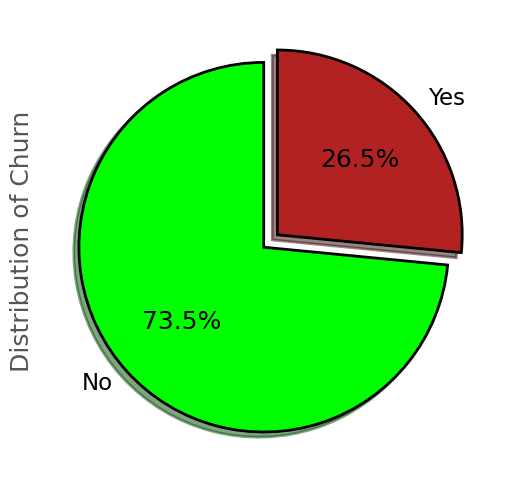

In [6]:
fig = plt.figure(figsize=(6,6))
colors =('lime','firebrick','limegreen', 'orangered',  'red', 'green')
wp ={'linewidth':2, "edgecolor":'black'}
pie=  df["Churn"].value_counts()/df.shape[0]
explode=(0.05,0.05)
pie.plot(kind='pie', autopct="%1.1f%%", shadow= True , colors= colors , startangle =90, wedgeprops=wp, explode = explode , label='Distribution of Churn')

from io import BytesIO
graph = BytesIO()

We’re trying to predict users that left the company in the previous month. It’s a binary classification problem with an unbalanced target.

- Churn: No – 73.5%
- Churn: Yes – 26.5%


In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Exploratory Data Analysis


#### Let's analyze categorical columns first

Before proceeding, it's necessary to simplify the features by replacing occurrences of 'No internet service' and 'No phone service' with 'No', as they are functionally equivalent.

In [8]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

We are going to divide the feature columns in 3 different categories as per their functionalities

In [9]:
list_1 = ['gender','SeniorCitizen','Partner','Dependents'] # Demographic customer information

list_2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services that each customer has signed up for

list_3 = ['Contract','PaperlessBilling','PaymentMethod'] # Customer account information

#### Demographic customer information

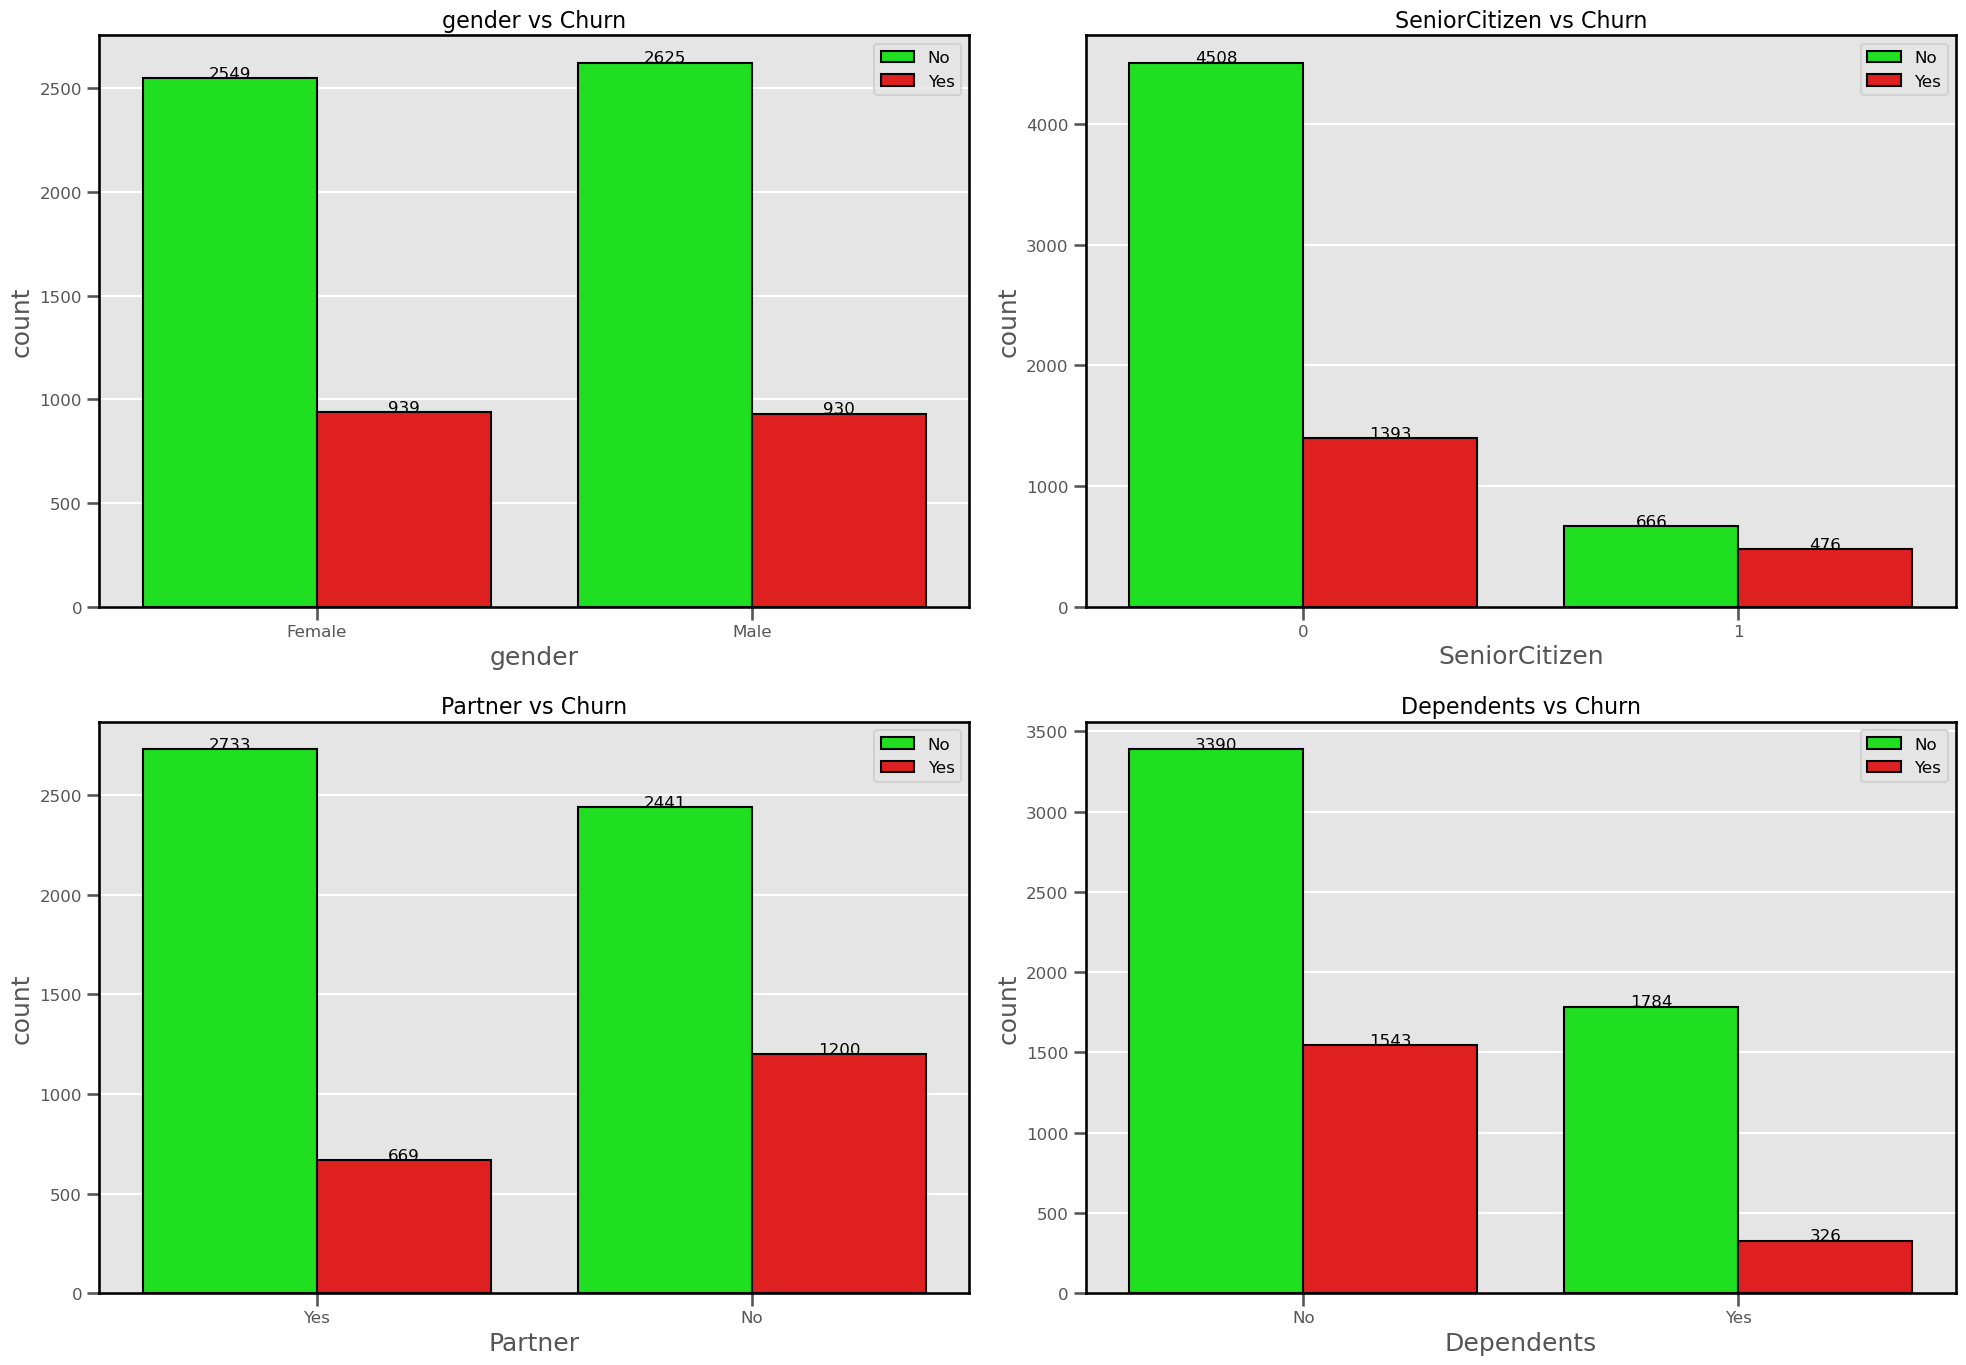

In [10]:


# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
colors = ('lime','red' , 'royalblue', 'orangered','tomato' , 'green')

# Iterate over features
for i, feature in enumerate(list_1):
    ax = sns.countplot(x=feature, data=df, hue="Churn", palette=colors, edgecolor='black', ax=axes[i//2, i%2])
    
    # Add counts above bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), 
                ha='center', fontsize=12, color='black')
        
    
    # Set title
    title = feature + ' vs Churn'
    ax.set_title(title, fontsize=16)
    
    # Set labels font size
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Set legend font size
    ax.legend(fontsize=12)
    
    # Set borders
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')

# Adjust layout
plt.tight_layout()
plt.show()


Demographic analysis insight:
- Gender and partner are evenly distributed with approximate percentage values.
- The difference in churn is slightly higher in females, but the small difference can be ignored.
- There’s a higher proportion of churn in younger customers (SeniorCitizen = No), customers with no partners, and customers with no dependents.
- The demographic section of data highlights non-senior citizens with no partners and dependents as a particular segment of customers likely to churn.


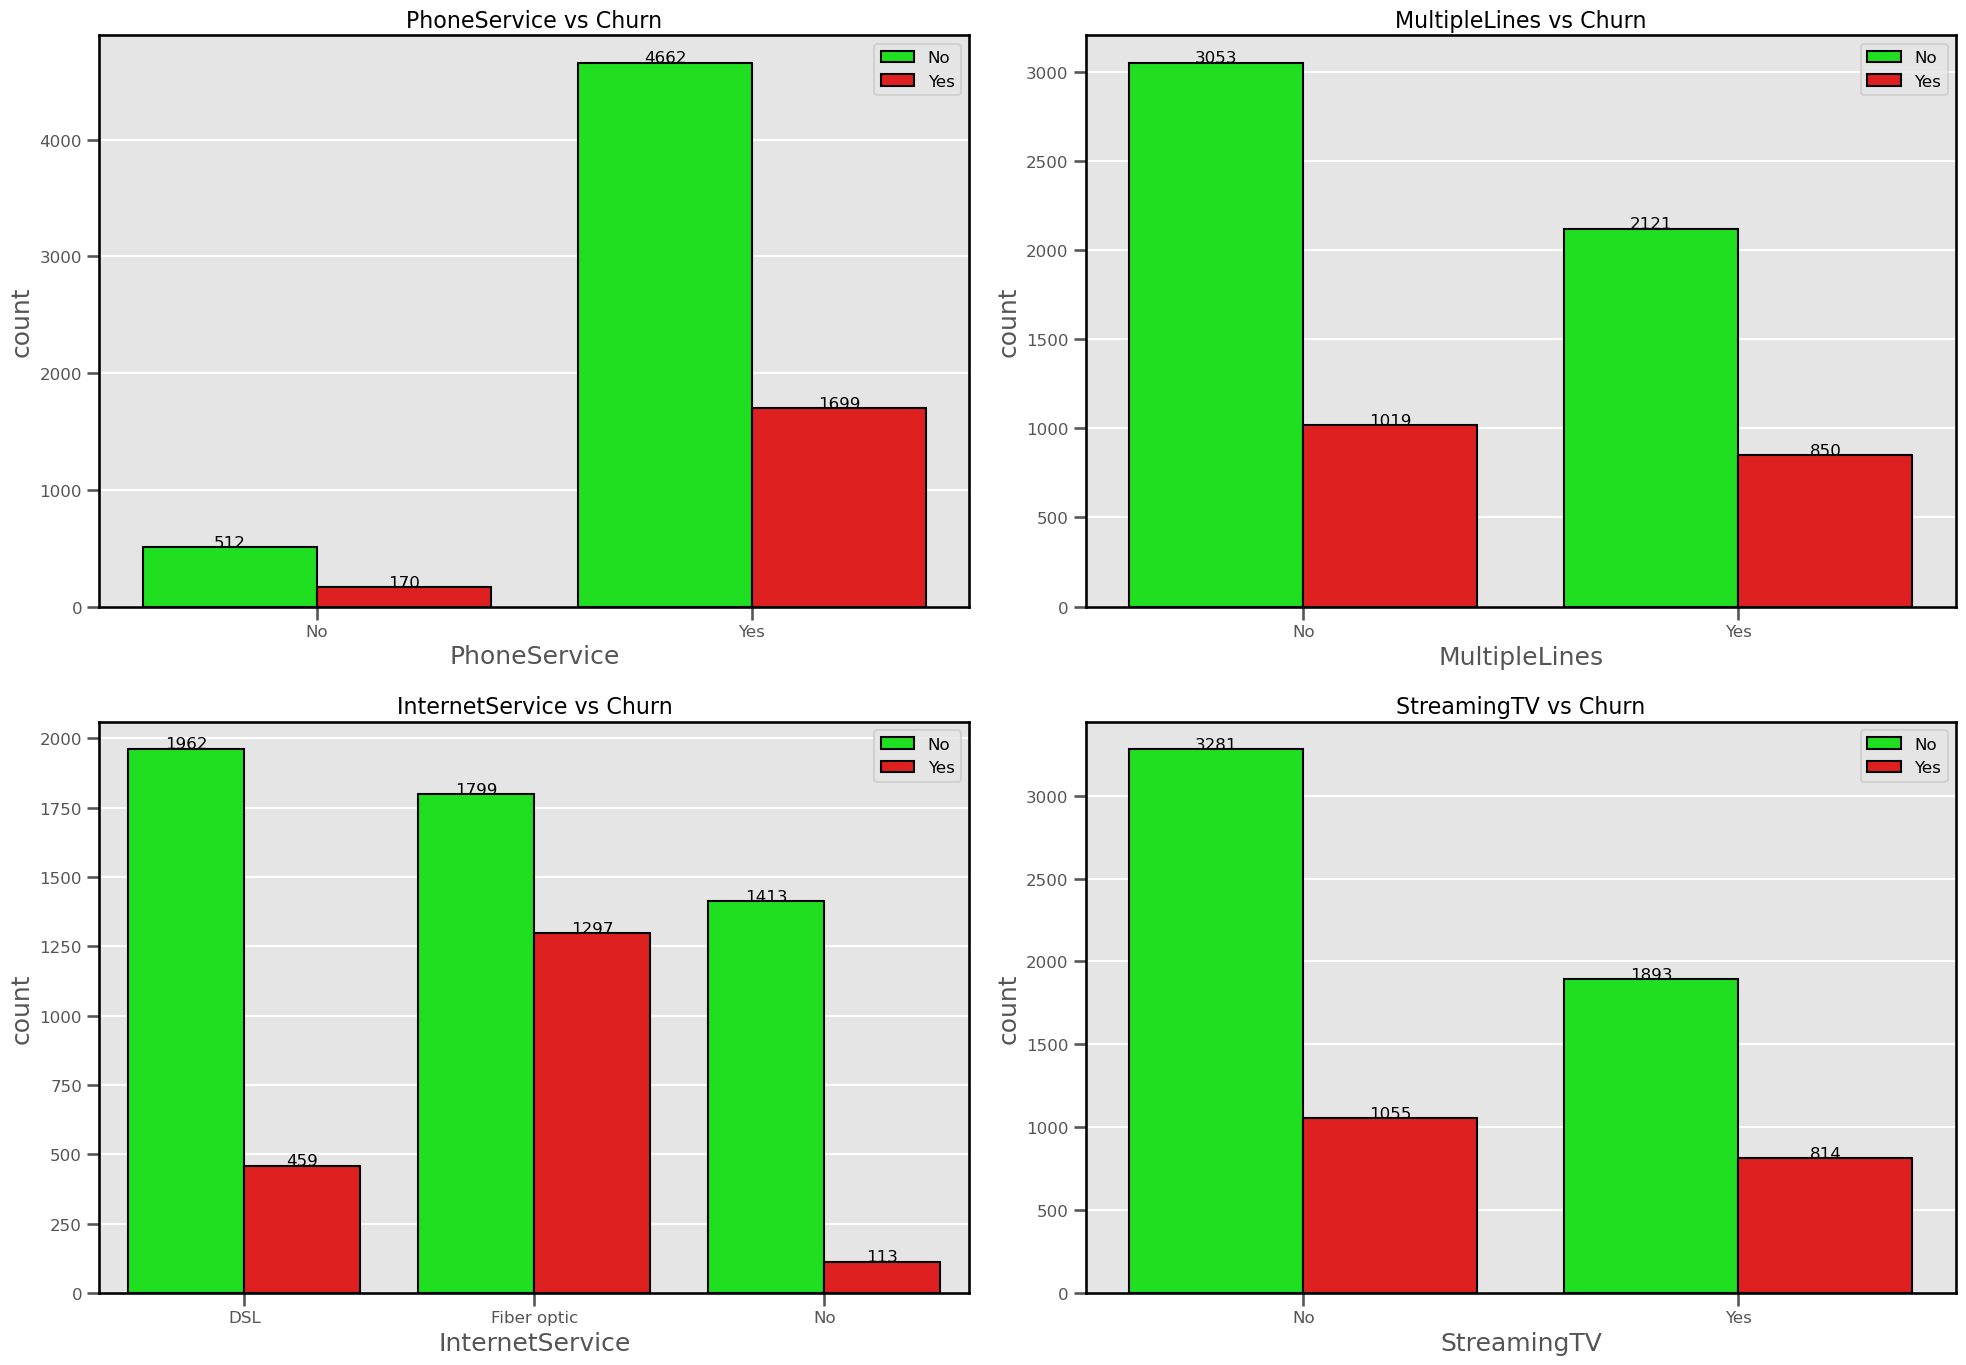

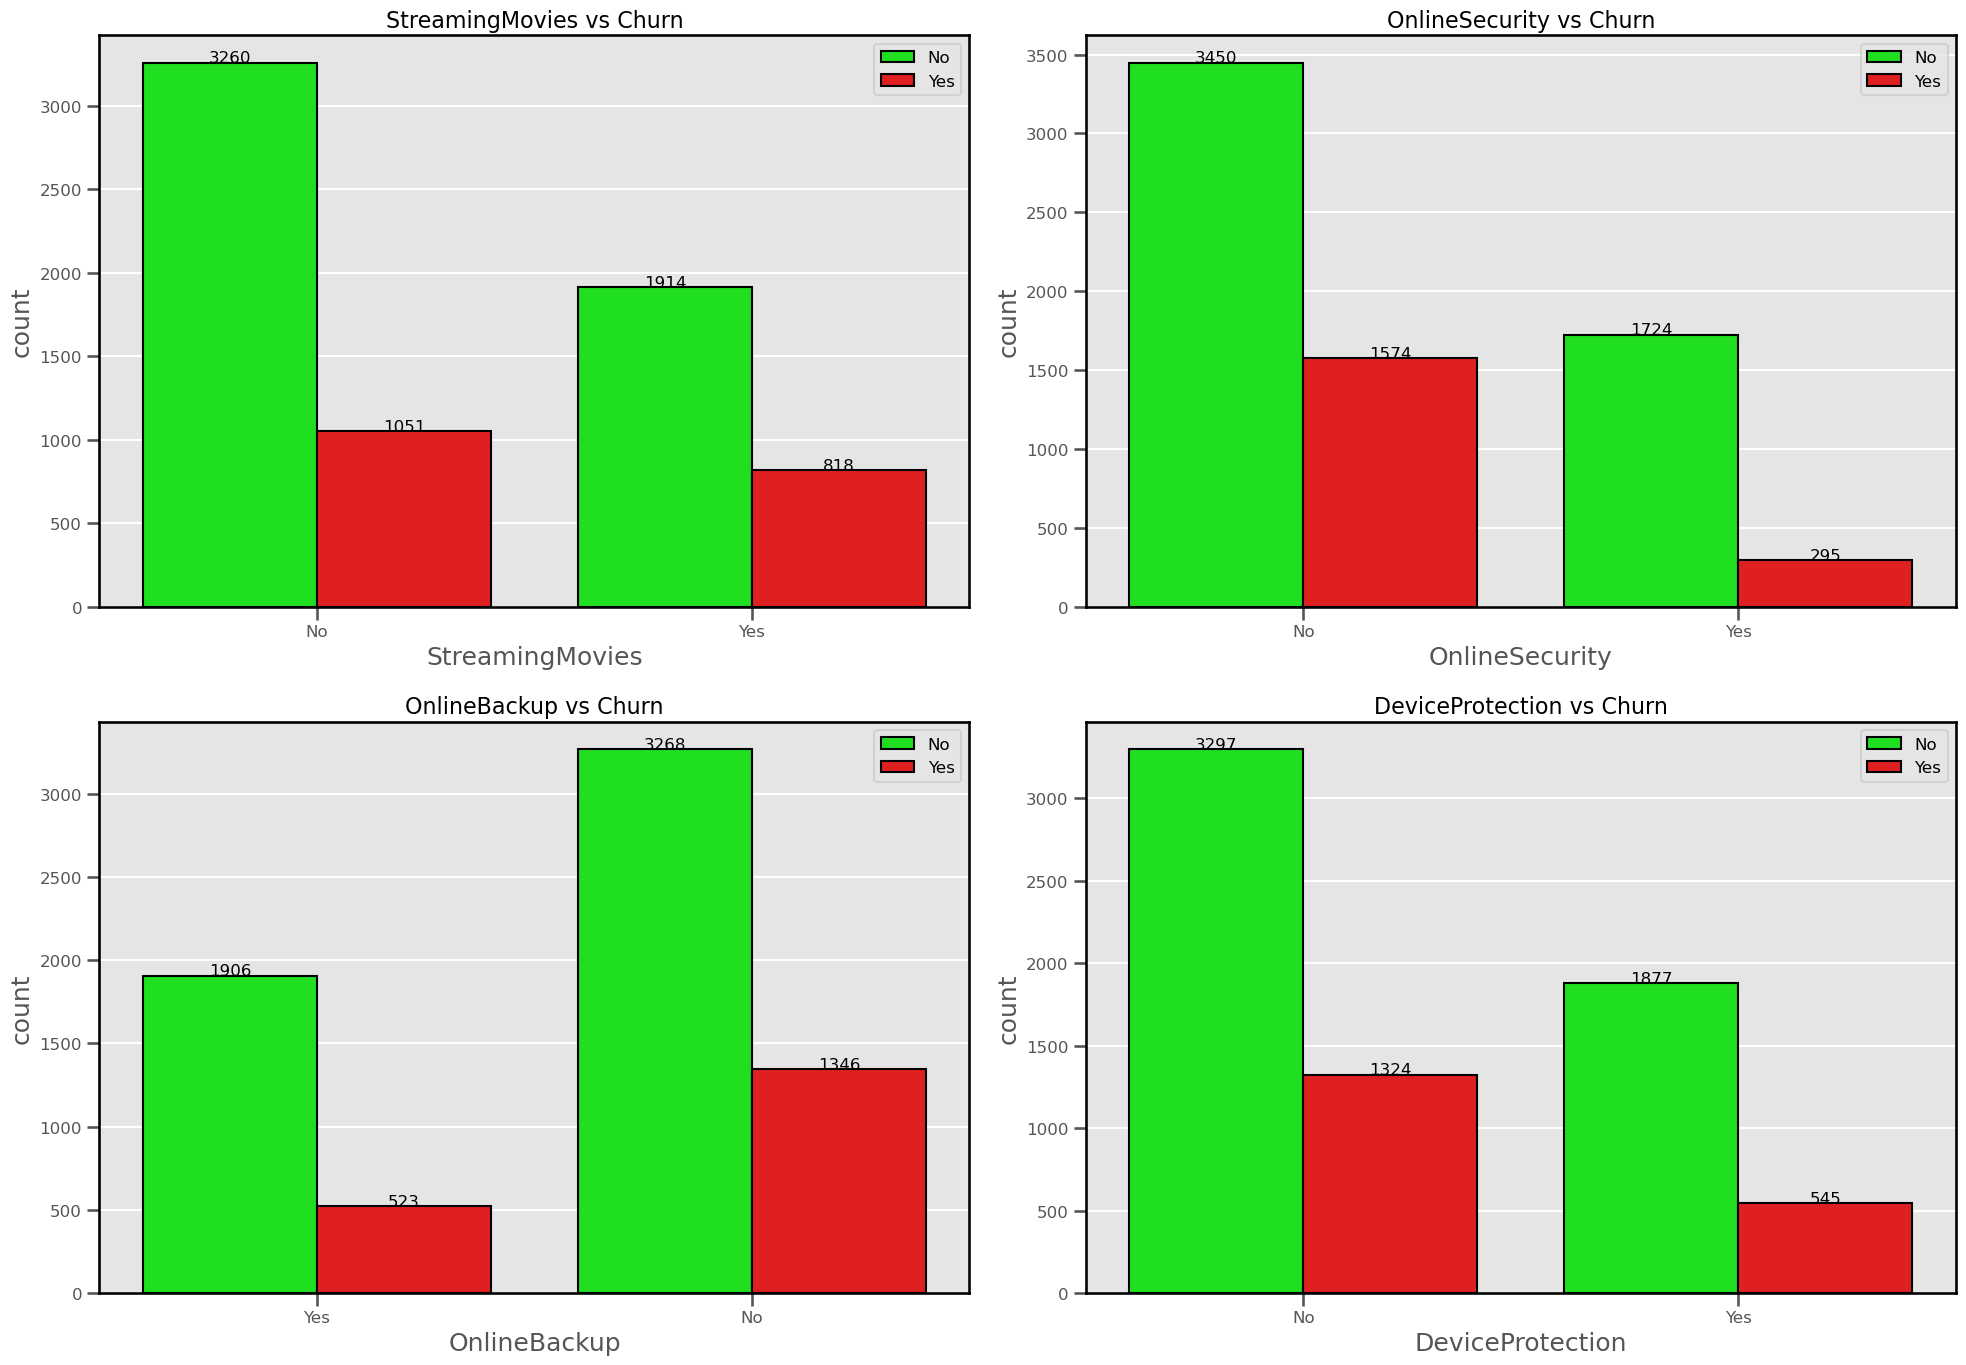

In [11]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
colors = ('lime','red' , 'royalblue', 'orangered','tomato' , 'green')

# Iterate over features
for i, feature in enumerate(list_2[:4]):
    ax = sns.countplot(x=feature, data=df, hue="Churn", palette=colors, edgecolor='black', ax=axes[i//2, i%2])
    
    # Add counts above bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), 
                ha='center', fontsize=12, color='black')
        
    
    # Set title
    title = feature + ' vs Churn'
    ax.set_title(title, fontsize=16)
    
    # Set labels font size
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Set legend font size
    ax.legend(fontsize=12)
    
    # Set borders
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')

# Adjust layout
plt.tight_layout()
plt.show()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
colors = ('lime','red' , 'royalblue', 'orangered','tomato' , 'green')

# Iterate over features
for i, feature in enumerate(list_2[4:8]):
    ax = sns.countplot(x=feature, data=df, hue="Churn", palette=colors, edgecolor='black', ax=axes[i//2, i%2])
    
    # Add counts above bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), 
                ha='center', fontsize=12, color='black')
        
    
    # Set title
    title = feature + ' vs Churn'
    ax.set_title(title, fontsize=16)
    
    # Set labels font size
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Set legend font size
    ax.legend(fontsize=12)
    
    # Set borders
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')

# Adjust layout
plt.tight_layout()
plt.show()

Insight on the services each customer has signed up for:

- These features exhibit significant variations across their values.
- If a customer doesn't have phone service, they cannot have multiple lines.
- Approximately more than 90% of the customers have phone services, and they have a higher churn rate.
- Customers who have fiber optic as their internet service are more likely to churn. This could be attributed to factors such as high prices, competition, and customer service issues. Fiber optic service tends to be more expensive than DSL, which may contribute to customer churn.
- Customers with OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are less likely to churn, indicating that these additional services play a role in customer retention.
- The presence of streaming service is not predictive for churn, as it's evenly distributed between "yes" and "no" options.

#### Time to explore payment features now.


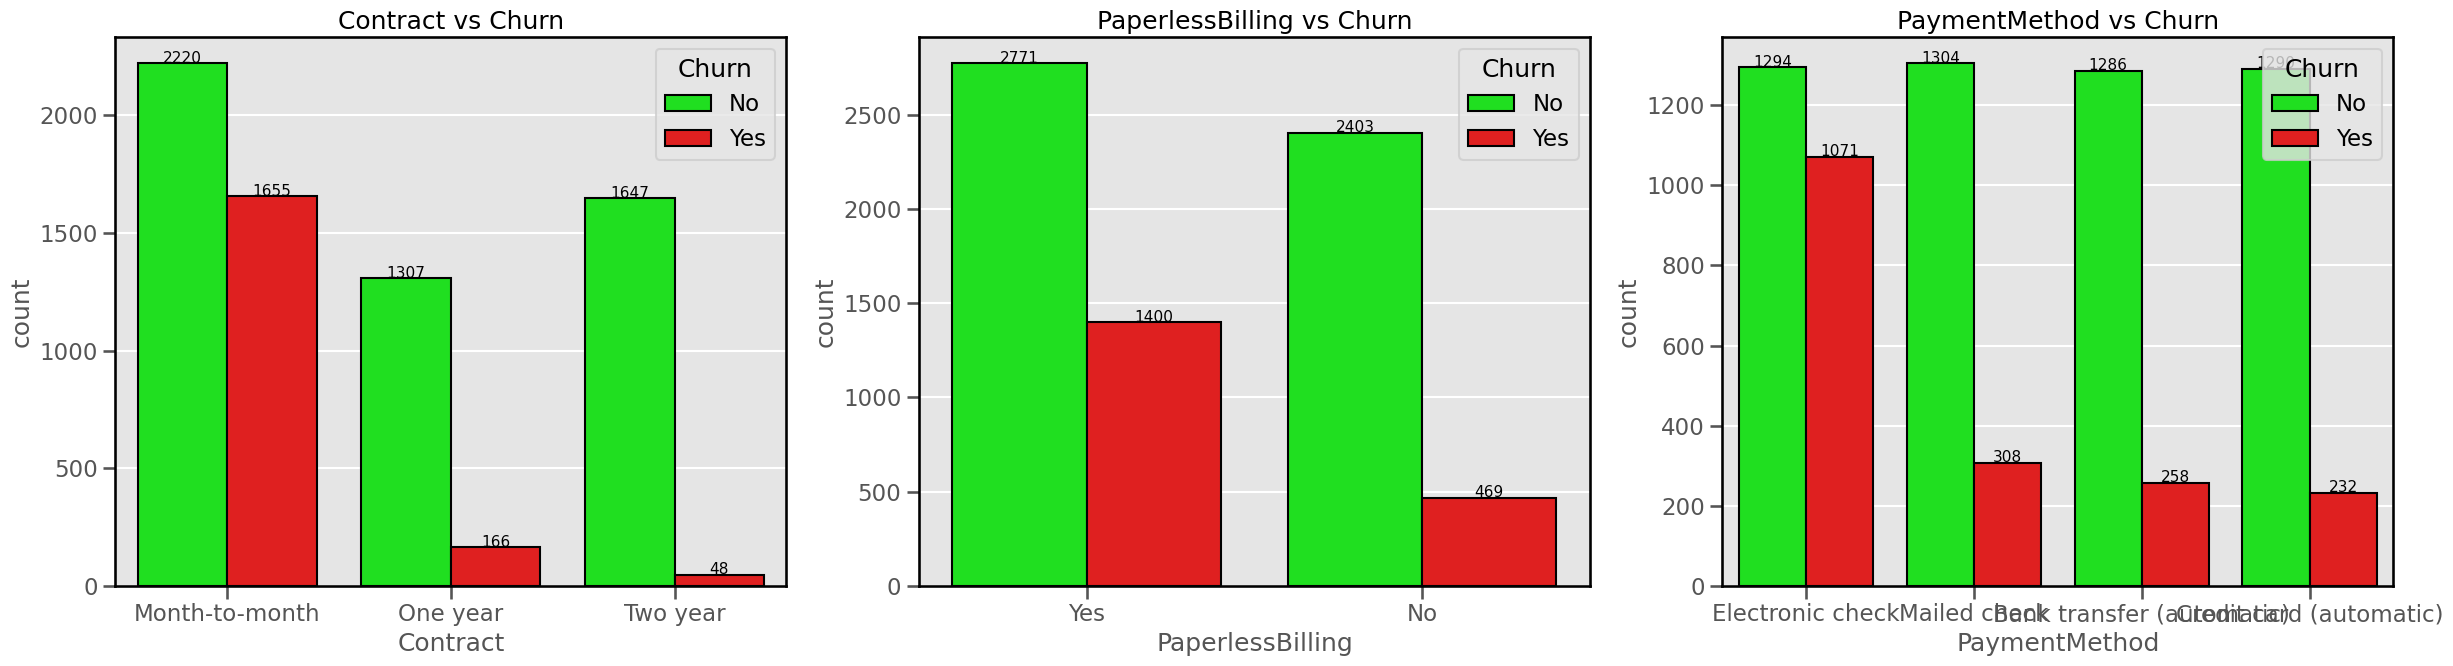

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

for i in range(3):
    ax = sns.countplot(x=list_3[i], hue="Churn", data=df, palette=colors, edgecolor='black', ax=axes[i])
    
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), 
                ha='center', fontsize=11)
    
    title = list_3[i] + ' vs Churn'
    ax.set_title(title)
    
    # Add borders
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')

plt.tight_layout()
plt.show()

Payment insights:
- The shorter the contract, the higher the churn rate. Customers with longer-term plans face additional barriers when canceling early, explaining the motivation for companies to foster long-term relationships with their customers.
- Churn rate is higher for customers who opted for paperless billing. Approximately 59.2% of customers use paperless billing.
- Customers who pay with electronic checks are more likely to churn, and this type of payment is more common than other payment types.


#### Now it's time to check the numerical features

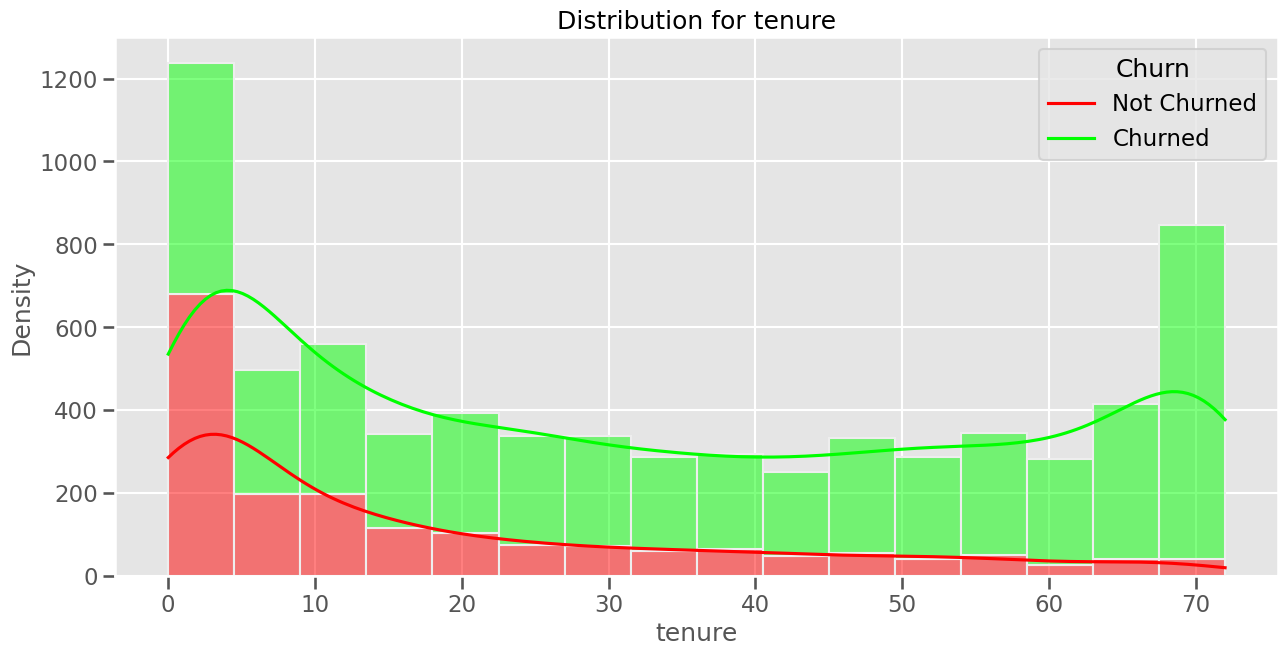

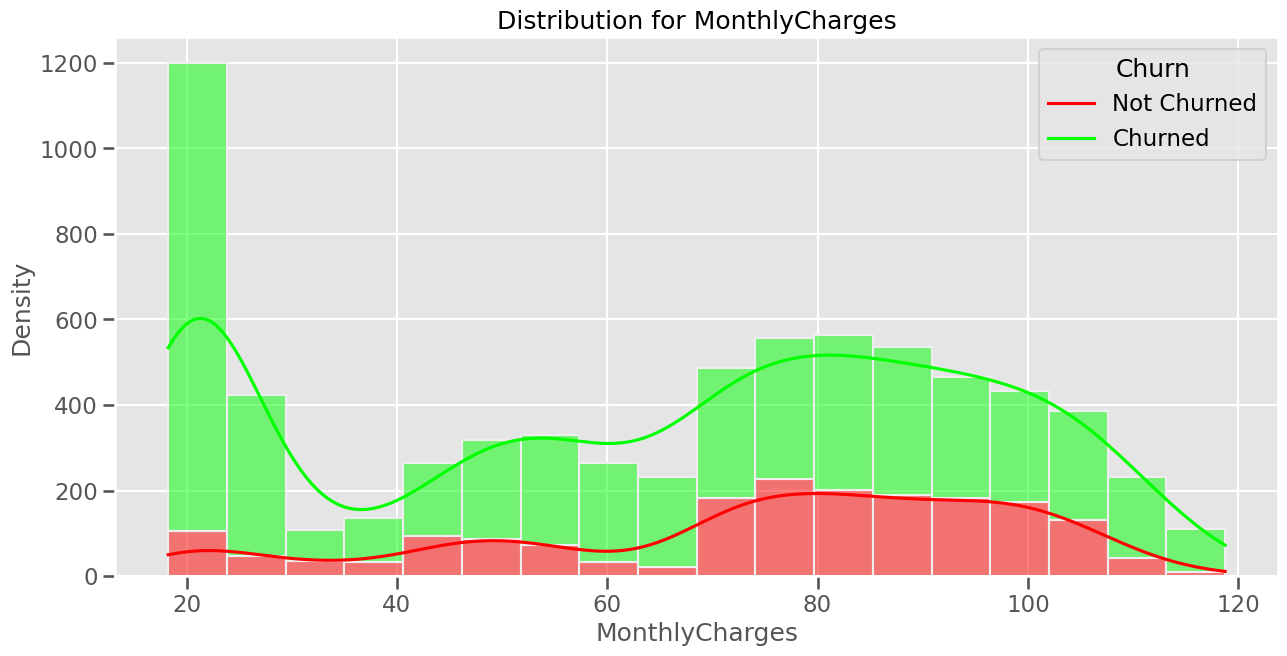

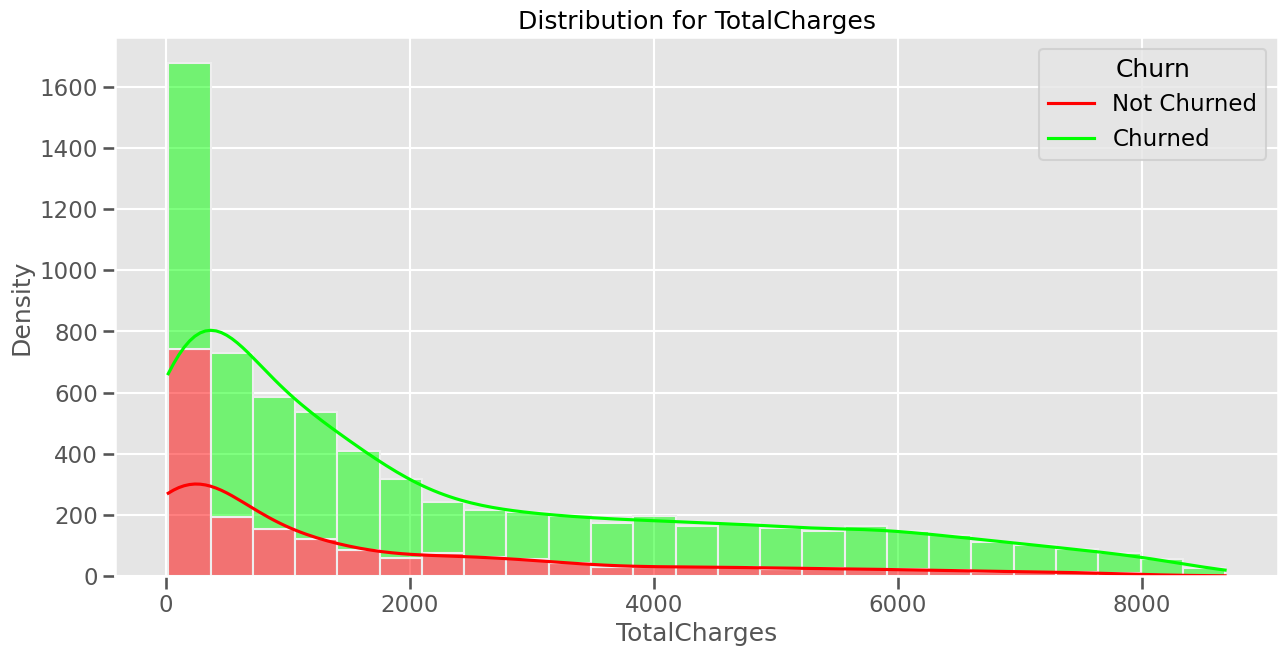

In [13]:
def distplot(feature):
    plt.figure(figsize=(15, 7))
    plt.title("Distribution for {}".format(feature))
    sns.histplot(df, x=feature, hue='Churn', multiple='stack', kde=True, palette={'No':'lime', 'Yes':'red'}, legend=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
    plt.show()

distplot('tenure')
distplot('MonthlyCharges')
distplot('TotalCharges')

Customer account information insight:
- The tenure histogram plot is rightly skewed, indicating that most customers have been with the telecom company for just the first few months (0-9 months). The highest rate of churn is also observed within the first few months (0-9 months).
- Most of the customers who end up leaving the Telco company do so within their first 30 months.
- The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate. This suggests that discounts and promotions should be promoted to increse the number of reasons for customers to stay.


One more thing before data preprocessing is to chek for outliers in the numeric datatype columns


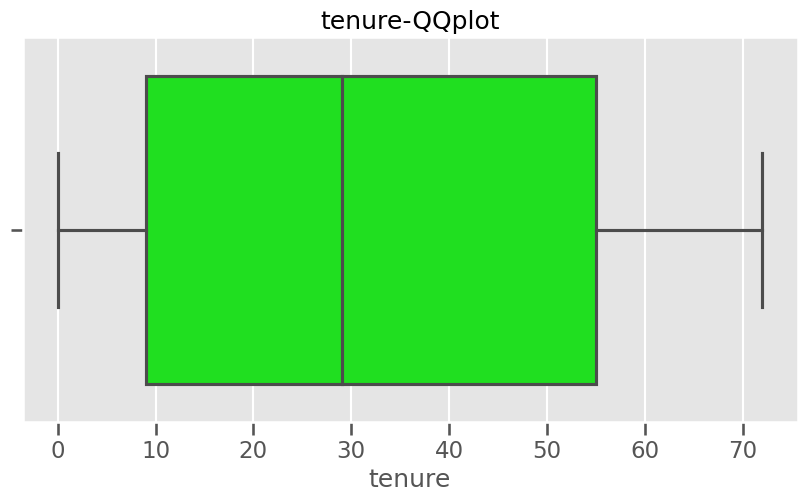

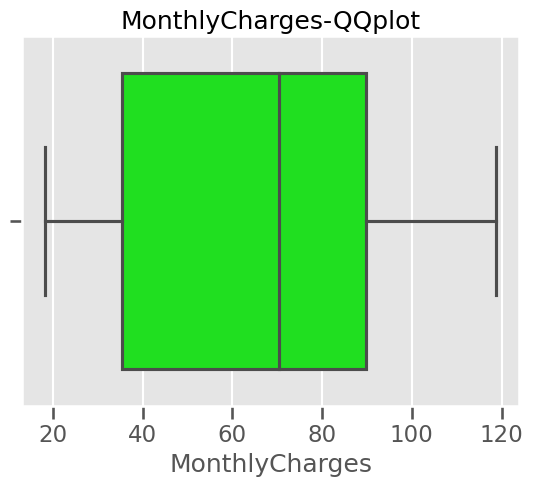

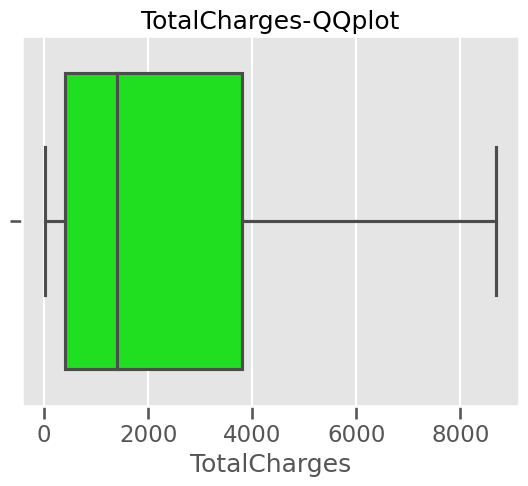

In [14]:
fig, axes = plt.subplots( figsize=(10, 5))
num_features=["tenure","MonthlyCharges","TotalCharges"]
for feature in num_features:
    ax=sns.boxplot(x= feature, data=df,palette=colors )
    titles = feature + '-QQplot'
    ax.set_title(titles)
    plt.show()

Luckily, here we don't have any outliers to deal with in the numerical datatype columns

### Data preprocessing

In this section, we will delve deeper into the data to extract additional insights and transform it into a format suitable for a variety of machine learning algorithms.

First, we must remove or impute the missing values in the dataset

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
#Here we will remove the missing values from 'TotalCharges' column
df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)

Let's make the categorical columns into a numerical for the sake of model training

In [17]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [18]:
#similarly,
two_cate = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in two_cate:
    df[i].replace({"No":0, "Yes":1}, inplace=True)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [19]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [20]:
#we have no use of customerId , so we can drop it
df=df.drop('customerID',axis=1)

In [21]:
#checking on those feature columns which are categorical and have more than two unique values
for i in df.columns:
    if (len(df[i].unique()) >2) & (df[i].dtypes != "int64") &(df[i].dtypes!= "float64"):
        print(i)

InternetService
Contract
PaymentMethod


In [22]:
encoding_features = ['InternetService' , 'Contract' ,'PaymentMethod']
df_encoded = pd.get_dummies(df, columns=encoding_features)

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


Now we must scale the numerical features

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
# X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
df_encoded[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


Let's explore the correlation between the features with our target feature

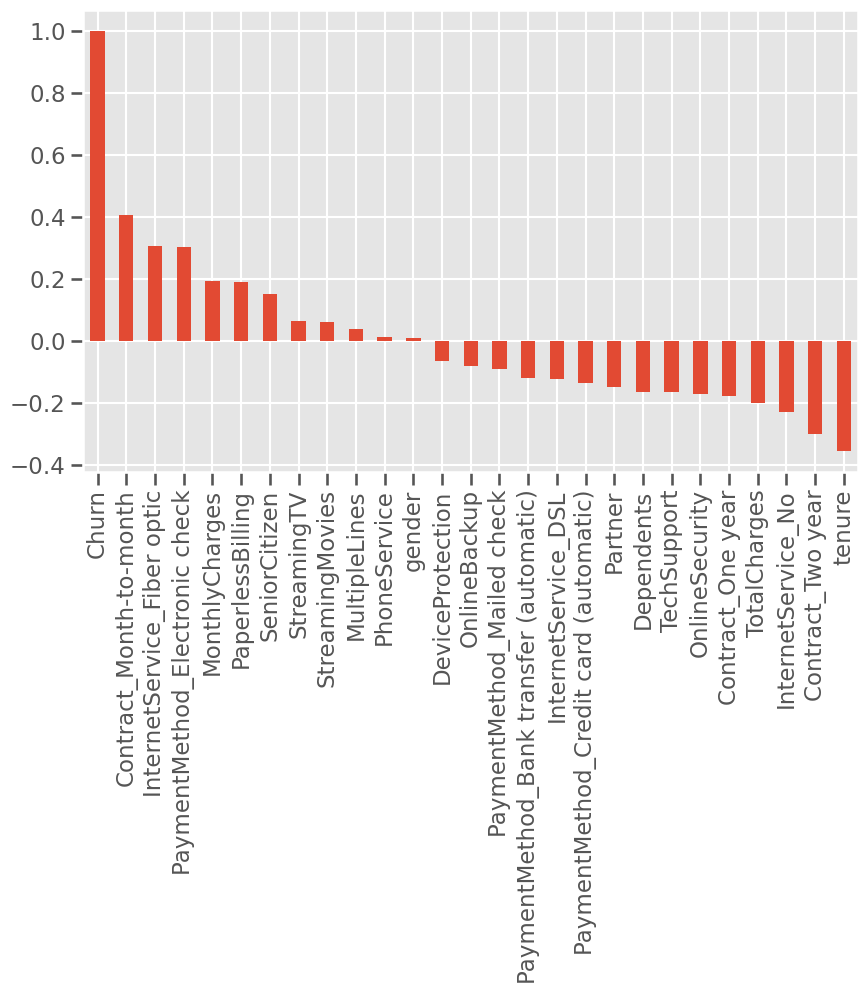

In [24]:
df_encoded.corr()["Churn"]
plt.figure(figsize=(10,6))
df_encoded.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
# plt.savefig("correlation.png", dpi=300)
plt.show()

##### Checking if there is any linear relationship between MonthlyCharges and TotalCharges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

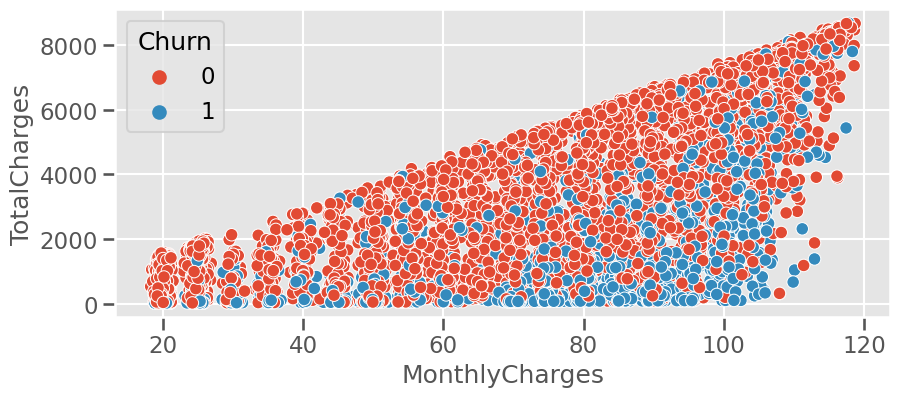

In [41]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

There is a kinda linear relationship between MonthlyCharges and TotalCharges which is quite obvious.

### Model Training

Dividing the dataset into train and test datasets

In [26]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

As we have 'moderate' class imbalance in the 'Churn' column , we have to deal with it by apply some sampling technique.
As this dataset isn't very large dataset , we must use any 'oversampling' method to deal with this problem.
Here, I'm using 'SMOTE-ENN' , you are free to use any method.
Here, I will be applying SMOTE-ENN strictly on the training dataset as applying oversampling techniques like SMOTE-ENN to the entire dataset, including both training and testing sets, can lead to data leakage.

In [28]:
# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train,  y_train= smote_enn.fit_resample(X_1,  y_1)

Training the dataset on various classification algorithms and comparing them

In [30]:
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Support Vector Machine", SVC(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("XGBoost", XGBClassifier(random_state=42)),  
    ("Decision Tree", DecisionTreeClassifier(random_state=42))
]
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Create an empty list for results
results_list = []

# Iterate over classifiers
for clf_name, clf in classifiers:
    start_time = time.time()
    pipe = Pipeline([
        ("classifier", clf)
    ])

    # Instantiate cross validation with X_sampled and y_sampled
    cv_score = cross_val_score(pipe,X_train,  y_train, cv=5, scoring='accuracy')

    # Predict on cross validation
    y_pred = cross_val_predict(pipe, X_test, y_test, cv=5)

    # Compute the metrics: Mean Accuracy, Precision, Recall, F1-Score
    mean_accuracy = np.mean(cv_score)
    precision = precision_score(y_test, y_pred)
    recall = recall_score( y_test, y_pred)
    f1_score_value = f1_score( y_test, y_pred)
    end_time = time.time()

    # Append the metrics into results_list
    
    results_list.append({
        "Classifier": clf_name,
        "Mean Accuracy": mean_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score_value,
        "Time taken" : end_time - start_time
    })
    
# Store the results_list into a DataFrame
results_df = pd.DataFrame(results_list)


As we are dealing with class imbalanced, we have to focus on key evaluation metrics including precision, recall, and F1-score to assess the models' predictive performance.We will be mainly focusing on 'Recall' score as 'Recall' measures the ability of the model to correctly identify all positive instances (churn cases) out of all actual positive instances. In the context of churn prediction, high recall means that the model can effectively identify most of the customers who are likely to churn. This is crucial for proactively targeting these customers with retention strategies.

In [31]:
results_df.sort_values(by='Recall', ascending=False)

,Classifier,Mean Accuracy,Precision,Recall,F1-Score,Time taken
6,Decision Tree,0.914849,0.561798,0.534759,0.547945,0.225265
0,Logistic Regression,0.913658,0.645270,0.510695,0.570149,0.388109
4,K-Nearest Neighbors,0.951369,0.492754,0.454545,0.472879,1.437376
2,Gradient Boosting,0.932515,0.610909,0.449198,0.517720,6.734282
1,Random Forest,0.960105,0.600719,0.446524,0.512270,5.117690
5,XGBoost,0.947799,0.610294,0.443850,0.513932,2.532103
3,Support Vector Machine,0.934301,0.637168,0.385027,0.480000,2.728285


#### Key findings from the above table:

- Random Forest has the highest mean accuracy, while Decision Tree has the lowest.
- Gradient Boosting and RFC have the longest training times.
- Precision is generally higher than recall across most models.
- None of the models excel in all metrics simultaneously, indicating trade-offs between accuracy, precision, recall, and training time.



#### Hyperparameter Tuning

I will refrain myself from conducting hyperparameter tuning on SVM for it's low recall score and f1 score and Gradient Boosting model due to it's longer prediction time, which could impact the deployment of this notebook. Deploying models with extended prediction times may not be ideal for real-time or production environments. Instead, I will focus on applying hyperparameter tuning to other models to enhance their performance and efficiency.

##### Logistic Regression

   Train Accuracy  Test Accuracy  Precision   Recall      AUC  F1 Score
0         0.88825        0.63682    0.41491  0.89305  0.71855   0.56658
1         0.88825        0.63682    0.41491  0.89305  0.71855   0.56658
2         0.88825        0.63682    0.41491  0.89305  0.71855   0.56658
3         0.88825        0.63682    0.41491  0.89305  0.71855   0.56658


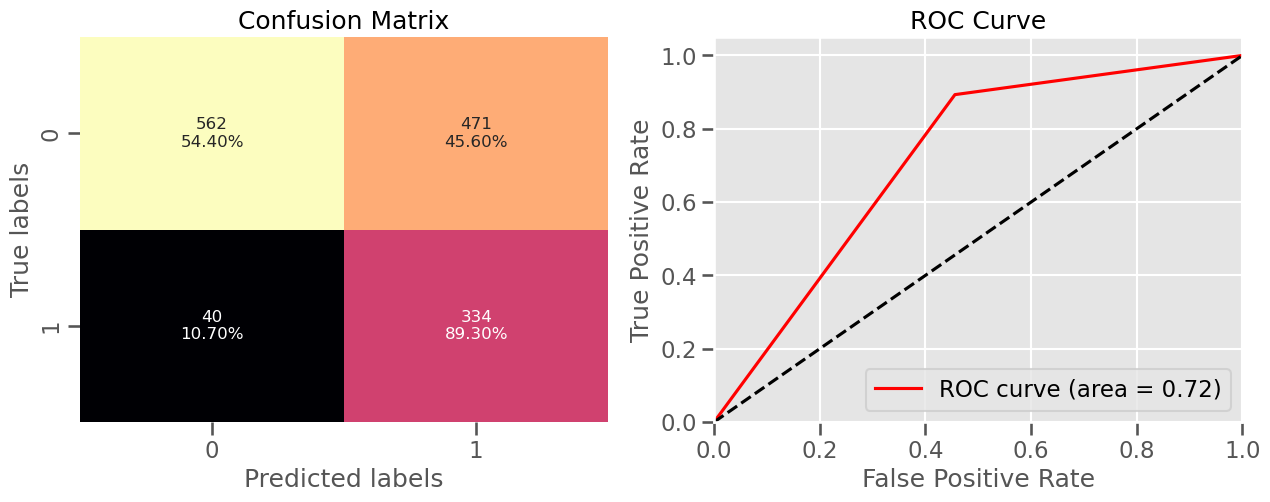

In [33]:

# Define the classifiers
clf = [
    LogisticRegression(solver='newton-cg', penalty='l2', C=0.001, max_iter=1000),
    LogisticRegression(solver='lbfgs', penalty='l2', C=0.001, max_iter=1000),
    LogisticRegression(solver='sag', penalty='l2', C=0.001, max_iter=1000),
    LogisticRegression(solver='saga', penalty='l2', C=0.001, max_iter=1000)
]

# Define DataFrame columns
clf_columns = []
clf_compare = pd.DataFrame(columns=clf_columns)

# Initialize row index
row_index = 0

# Loop through each classifier
for alg in clf:
    # Fit the classifier and make predictions
    predicted = alg.fit(X_train, y_train).predict(X_test)
    
    # Compute ROC curve
    fp, tp, _ = roc_curve(y_test, predicted)
    
    # Get classifier name
    clf_name = alg.__class__.__name__
    
    # Populate DataFrame with performance metrics
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted), 5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted), 5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp), 5)
    clf_compare.loc[row_index, 'F1 Score'] = round(f1_score(y_test, predicted), 5)

    row_index += 1

# Sort the DataFrame by Test Accuracy
clf_compare.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

# Display the DataFrame
print(clf_compare)

# Plot confusion matrix and ROC-AUC curve for the best classifier
best_classifier = clf_compare.iloc[0]  # Assuming the first row has the best classifier

# Confusion Matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, predicted)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
annot = np.array([[f"{n}\n{pct:.2%}" for n, pct in zip(row, row_norm)] for row, row_norm in zip(cm, cm_norm)])
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="magma",
    cbar=False,
    annot_kws={"size": 12},
)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# ROC-AUC Curve
plt.subplot(1, 2, 2)
plt.plot(fp, tp, label='ROC curve (area = %0.2f)' % best_classifier['AUC'], color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


##### KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, recall_score
from scipy.stats import randint

# Define the pipeline
pipe_knn = Pipeline([
    ('classifier', KNeighborsClassifier())
])

# Define the parameter distribution for KNN
knn_param_dist = {
    'classifier__n_neighbors': randint(1, 20),  # Random integer between 1 and 20 for number of neighbors
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Instantiate RandomizedSearchCV object for KNN
knn_random = RandomizedSearchCV(pipe_knn, param_distributions=knn_param_dist,
                                n_iter=100, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the knn_random with resampled data
knn_random.fit(X_train, y_train)

# Get the results
best_knn_params_random = knn_random.best_params_
best_knn_score_random = knn_random.best_score_

# Print the best parameters for KNN
print('Best KNN Parameters (Randomized Search): ')
print(best_knn_params_random)
print('Best score:', best_knn_score_random)

# Define the pipeline for KNN with best parameters



Best KNN Parameters (Randomized Search): 
{'classifier__algorithm': 'ball_tree', 'classifier__n_neighbors': 1, 'classifier__weights': 'distance'}
Best score: 0.9749901483267918


              precision    recall  f1-score   support

           0       0.90      0.64      0.75      1033
           1       0.45      0.80      0.57       374

    accuracy                           0.68      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.78      0.68      0.70      1407

   Precision    Recall  F1-Score
0   0.445104  0.802139  0.572519


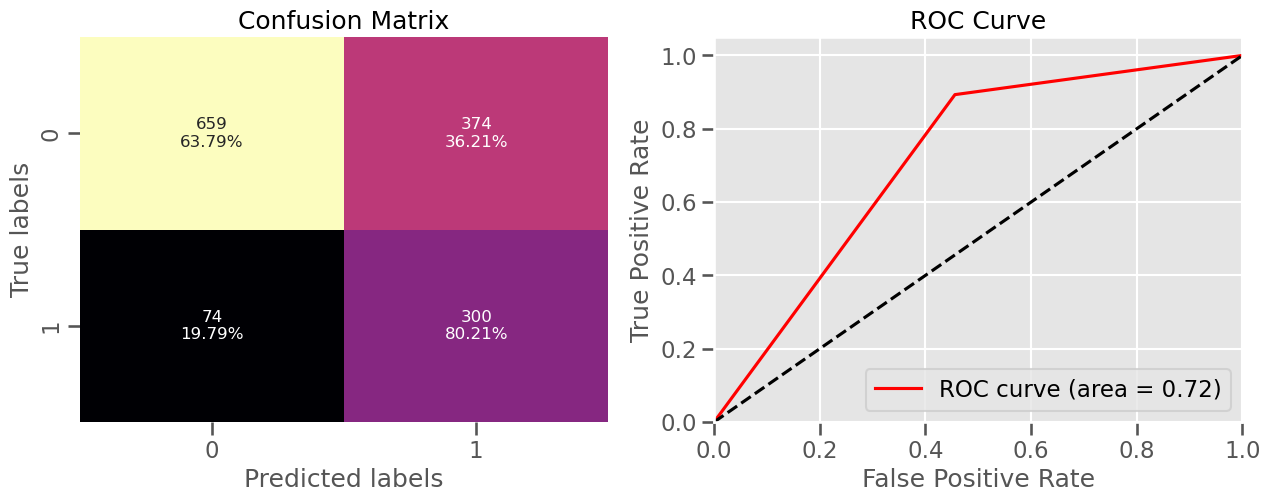

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, recall_score

# Define the pipeline
knn_clf = Pipeline([
    ('clf', KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='ball_tree', leaf_size=40, p=2, metric='minkowski',  n_jobs=-1))
])

# Fit the training data to the model
knn_clf.fit(X_train, y_train)

# Prediction on test data
y_pred_knn = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred_knn))
precision = precision_score(y_test, y_pred_knn)
recall = recall_score( y_test, y_pred_knn)
f1_score_value = f1_score( y_test, y_pred_knn)
results_list = []
results_list.append({
        
       
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score_value,
        
    })
    
# Store the results_list into a DataFrame
results_df = pd.DataFrame(results_list)
print(results_df.sort_values(by='Recall', ascending=False))
# Confusion Matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_knn)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
annot = np.array([[f"{n}\n{pct:.2%}" for n, pct in zip(row, row_norm)] for row, row_norm in zip(cm, cm_norm)])
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="magma",
    cbar=False,
    annot_kws={"size": 12},
)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# ROC-AUC Curve
plt.subplot(1, 2, 2)
plt.plot(fp, tp, label='ROC curve (area = %0.2f)' % best_classifier['AUC'], color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### XGBoost

Best XGBoost Parameters (Randomized Search): 
{'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 9, 'classifier__n_estimators': 463, 'classifier__random_state': 0, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 1.0, 'classifier__subsample': 0.7}
Best score: 0.9589141879856875
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407

   Precision    Recall  F1-Score
0   0.470874  0.778075  0.586694


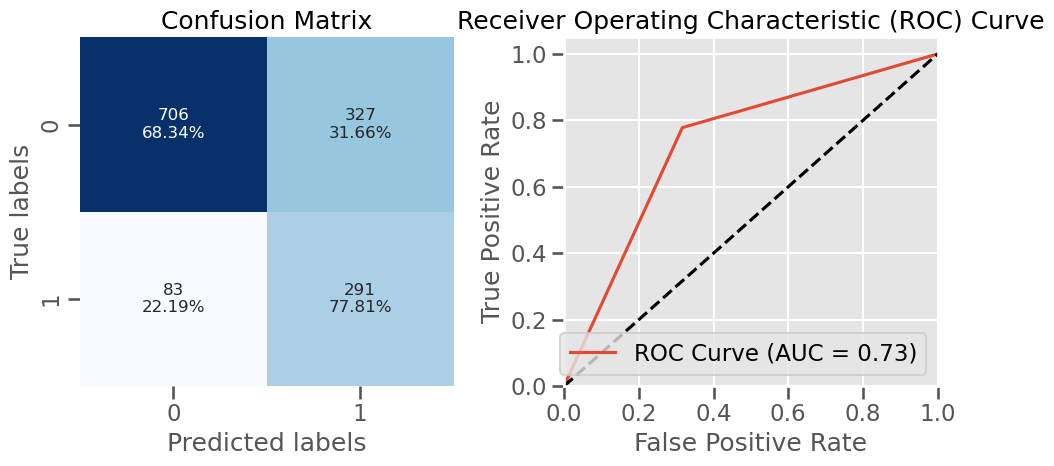

In [36]:
# Define the pipeline
pipe_xgb = Pipeline([
    ('classifier', XGBClassifier())
])

# Define the parameter distribution for XGBoost
xgb_param_dist = {
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': randint(100, 500),
    'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'classifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__reg_alpha': [0, 0.1, 0.5, 1.0],
    'classifier__reg_lambda': [0, 1.0, 10.0, 100.0],
    'classifier__random_state': [0]
}

# Instantiate RandomizedSearchCV object for XGBoost
xgb_random = RandomizedSearchCV(pipe_xgb, param_distributions=xgb_param_dist,
                                n_iter=100, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the xgb_random with resampled data
xgb_random.fit(X_train, y_train)

# Get the results
best_xgb_params_random = xgb_random.best_params_
best_xgb_score_random = xgb_random.best_score_

# Print the best parameters for XGBoost
print('Best XGBoost Parameters (Randomized Search): ')
print(best_xgb_params_random)
print('Best score:', best_xgb_score_random)
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, recall_score

xgb_clf = Pipeline([
    ('xgb', XGBClassifier(**xgb_random.best_params_))
])

# Fit the training data to the model
xgb_clf.fit(X_train, y_train)

# Prediction on test data
y_pred_xgb = xgb_clf.predict(X_test)

# Print classification report and recall score
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score( y_test, y_pred_xgb)
f1_score_value = f1_score( y_test, y_pred_xgb)
results_list = []
results_list.append({
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score_value
    })
    
# Store the results_list into a DataFrame
results_df = pd.DataFrame(results_list)
print(results_df.sort_values(by='Recall', ascending=False))
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_xgb)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
annot = np.array([[f"{n}\n{pct:.2%}" for n, pct in zip(row, row_norm)] for row, row_norm in zip(cm, cm_norm)])
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    cbar=False,
    annot_kws={"size": 12},
)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Plot ROC-AUC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show() 

##### RandomForestClassifier

In [37]:
pipe_rf = Pipeline([
    ('classifier', RandomForestClassifier())
])

# Define the parameter distribution for Random Forest
rf_param_dist = {
    'classifier__n_estimators': randint(100, 500),  # Randomly sample from 100 to 500
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 11),  # Randomly sample from 2 to 10
    'classifier__min_samples_leaf': randint(1, 5),  # Randomly sample from 1 to 4
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False],
    'classifier__random_state': [0]
}

# Instantiate RandomizedSearchCV object
rf_random = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_dist,
                               n_iter=100, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the rf_random with resampled data
rf_random.fit(X_train, y_train)

# Get the results
best_rf_params_random = rf_random.best_params_
best_rf_score_random = rf_random.best_score_

# print the best parameters
print('Best Random Forest Parameters (Randomized Search): ')
print(best_rf_params_random)
print('Best score:', best_rf_score_random)


Best Random Forest Parameters (Randomized Search): 
{'classifier__bootstrap': False, 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 373, 'classifier__random_state': 0}
Best score: 0.9666546476253526


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407

   Precision    Recall  F1-Score
0   0.472843  0.791444     0.592


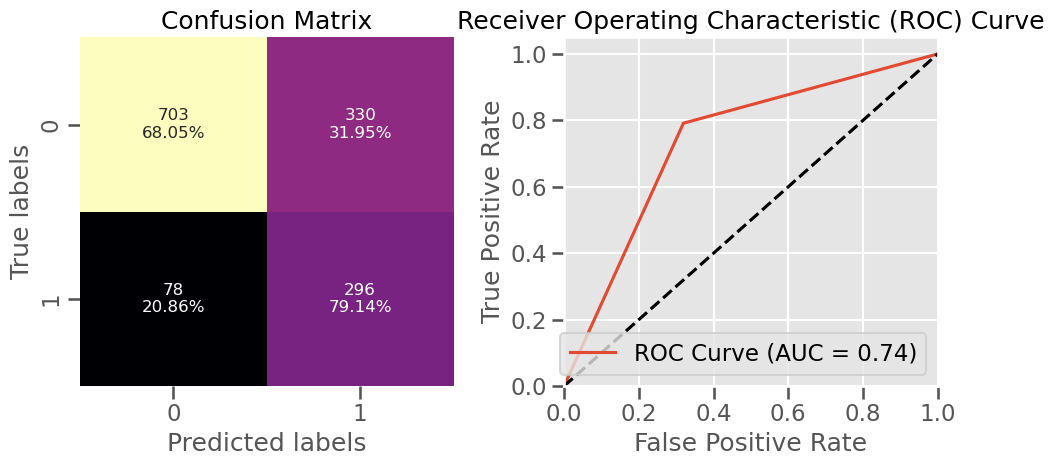

In [38]:


# Instantiate Random Forest Classifier with Robust Scaler and best parameters
rf_clf = Pipeline([
    ('rf', RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=None,
                                   min_samples_leaf=1, min_samples_split=3,
                                   max_features='log2', n_estimators=373, random_state=0))
])

# Fit the training data to the model
rf_clf.fit(X_train, y_train)

# Prediction on test data
y_pred_rf = rf_clf.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Calculate recall score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score( y_test, y_pred_rf)
f1_score_value = f1_score( y_test, y_pred_rf)
results_list = []
results_list.append({
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score_value  })
    
# Store the results_list into a DataFrame
results_df = pd.DataFrame(results_list)
print(results_df.sort_values(by='Recall', ascending=False))

# Confusion Matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_rf)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
annot = np.array([[f"{n}\n{pct:.2%}" for n, pct in zip(row, row_norm)] for row, row_norm in zip(cm, cm_norm)])
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="magma",
    cbar=False,
    annot_kws={"size": 12},
)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# ROC-AUC Curve

# Plot ROC-AUC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
xgb_roc_auc = roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show() 

##### DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, recall_score

# Define the pipeline
pipe_dt = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

# Print the pipeline steps for verification
print("Pipeline Steps:")
print(pipe_dt.steps)

# Define the parameter distribution for Decision Tree
dt_param_dist = {
    'classifier__max_depth': randint(3, 10),
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__random_state': [0]
}

# Print the parameter distribution for verification
print("\nParameter Distribution:")
print(dt_param_dist)

# Instantiate RandomizedSearchCV object for Decision Tree
dt_random = RandomizedSearchCV(pipe_dt, param_distributions=dt_param_dist,
                               n_iter=100, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the dt_random with resampled data
print("\nFitting RandomizedSearchCV...")
dt_random.fit(X_train, y_train)

# Get the results
best_dt_params_random = dt_random.best_params_
best_dt_score_random = dt_random.best_score_

# Print the best parameters and score for verification
print("\nBest Parameters (Randomized Search):")
print(best_dt_params_random)
print("Best Score:", best_dt_score_random)


Pipeline Steps:
[('classifier', DecisionTreeClassifier())]

Parameter Distribution:
{'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022A6F4A5FD0>, 'classifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022A6F327150>, 'classifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022A6F3B0890>, 'classifier__max_features': ['auto', 'sqrt', 'log2'], 'classifier__random_state': [0]}

Fitting RandomizedSearchCV...

Best Parameters (Randomized Search):
{'classifier__max_depth': 9, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 9, 'classifier__random_state': 0}
Best Score: 0.912068693746946


              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407

   Precision    Recall  F1-Score
0   0.472843  0.791444     0.592


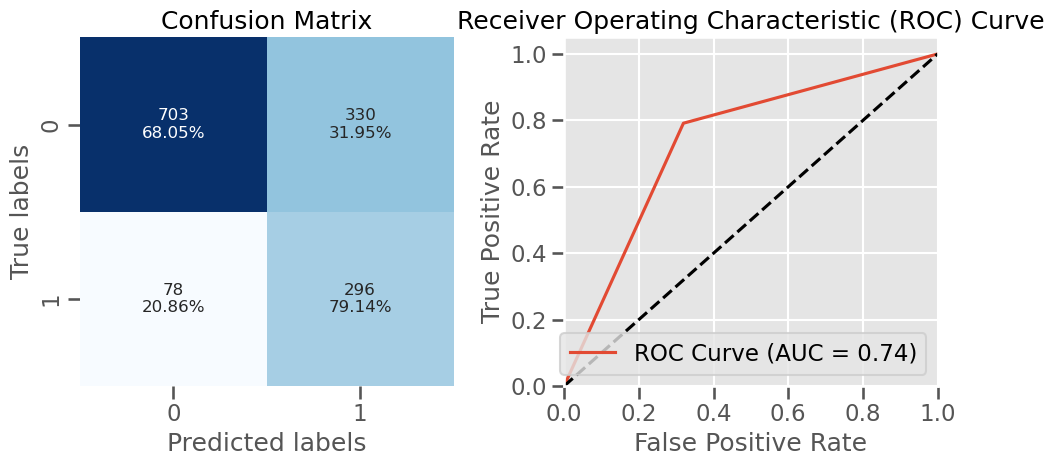

In [40]:
# Instantiate Random Forest Classifier with Robust Scaler and best parameters
dt_clf = Pipeline([
    
    ('dt', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=9, 
                                  min_samples_split=3, min_samples_leaf=2, min_weight_fraction_leaf=0.0, 
                                  max_features='sqrt', random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight=None, ccp_alpha=0.0))
])

# Fit the training data to the model
rf_clf.fit(X_train, y_train)

# Prediction on test data
y_pred_dt = rf_clf.predict(X_test)
print(classification_report(y_test,y_pred_dt))
precision = precision_score(y_test, y_pred_dt)
recall = recall_score( y_test, y_pred_dt)
f1_score_value = f1_score( y_test, y_pred_dt)
results_list = []
results_list.append({  
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score_value })
    
# Store the results_list into a DataFrame
results_df = pd.DataFrame(results_list)
print(results_df.sort_values(by='Recall', ascending=False))
# Confusion Matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test,y_pred_dt)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
annot = np.array([[f"{n}\n{pct:.2%}" for n, pct in zip(row, row_norm)] for row, row_norm in zip(cm, cm_norm)])
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    cbar=False,
    annot_kws={"size": 12},
)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# ROC-AUC Curve

# Plot ROC-AUC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
xgb_roc_auc = roc_auc_score(y_test, y_pred_dt)
plt.plot(fpr, tpr,  label="ROC Curve (AUC = %0.2f)" % xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show() 

#### Summary- Key Findings and Insights

- **Data Preprocessing:**
  - Initial exploration of the dataset revealed no missing values, and data types were checked for consistency.
  - Categorical features were encoded to convert them into numerical representations.
  - Exploratory data analysis was performed to identify trends and patterns within the dataset.

- **Model Selection and Evaluation:**
  - Various classifier models were evaluated, including Logistic Regression, Support Vector Classifier (SVC), K-Nearest     Neighbors (KNN), Decision Tree Classifier,Random Forest Classifier (RFC), Gradient Boosting Classifier, XGBoosting Classifier, and Decision Tree Classifier.
  - The primary evaluation metric used was the recall score and F1-score(which balances precision and recall for imbalanced datasets).

- **Model Performance:**
  - The Random Forest Classifier (RFC) and Decision Trees Classifier consistently demonstrated somewhat strong performance in terms of F1-score, recall, and precision across 'Yes' and 'No' classes.
  - Both achieved an F1-score around 0.6 for predicting customer churn, with competitive precision and recall.
  - Other models like XGBoost also showed promising performance with F1-scores around 0.59.
  - K-Nearest Neighbors (KNN) and LR performed slightly lower, with F1-scores around 0.57.

- **Model Explainability:**
  - RFC provides insights into feature importance, making it an interpretable choice for identifying key drivers of customer churn.
  - Other ensemble methods like Decision Tree and XGBoost also offer insights into feature importance.

- **Recommendation:**
  - Based on the F1-score and model explainability, the Random Forest Classifier (RFC) is recommended as the final model for predicting customer churn.
  - RFC offers a balance of accuracy, precision, recall, and interpretability.
  - Insights from the RFC model can guide decision-makers in taking steps to retain valuable customers and reduce churn.
  
- **Room for improvements:**
  - We can use different other models especially bagging and ensemble models. We can do an extensive feature selection with
    various statistical tests for model improvement.

In conclusion, the Random Forest Classifier is a robust choice for predicting customer churn, providing a practical balance between predictive power and explainability. The insights from the model can guide decision-makers in taking steps to retain valuable customers and reduce churn.


### Conclusion

- To effectively target three types of customers - SeniorCitizen, those living with a partner, and those living alone - the Telco Company must tailor its services and pricing strategies accordingly.
- SeniorCitizen customers, although fewer in number, demonstrate a willingness to pay higher MonthlyCharges. Hence, they expect top-tier service quality. Meanwhile, customers with a partner or those living alone prefer services with MonthlyCharges below 65.
- To attract and retain customers, especially during the critical first six months, the company should focus on providing essential support services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport. These services play a crucial role during the initial uncertain tenure, aiming to reduce churn within the 40-50 month range.
- After establishing a solid support infrastructure, the Telco Company should promote the usage of services like MultipleLines and Fiber Optic cables for PhoneService and InternetService, respectively. However, the challenge lies in managing the starting point of MonthlyCharges, which often exceeds 75+ for these services.
- Creating bundled options for PhoneService and InternetService, such as No MultipleLines with OpticFiber or MultipleLines with DSL, can help maintain an average MonthlyCharges range of 100-120. This strategy aims to increase the average income per user while eliminating lower-cost options that may result in lower revenue.
- Affordable pricing and reduced churn tenure are essential for services like StreamingTV and StreamingMovies. The content offered should cater to all customer demographics, accompanied by convenient PaymentMethods like Bank Transfer (automatic) and Credit Card (automatic). It's crucial to phase out Electronic check payments, which have higher churn rates.
- Features like PaperlessBilling, although convenient, come with a higher starting MonthlyCharges, around 60, compared to alternatives starting at 20. Customers become more cost-conscious once MonthlyCharges exceed 70 for any single service, emphasizing the importance of providing high-quality service to justify the cost.
- By implementing these measures, the Telco Company can boost revenue and enhance the value delivery process, ultimately improving customer satisfaction and retention.
